<a href="https://colab.research.google.com/github/CHATHARABOINASAGAR/NLP-LAB/blob/main/NLP(LAB-TEST-II)(T-SNF%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 21.5 MB/s eta 0:00:00


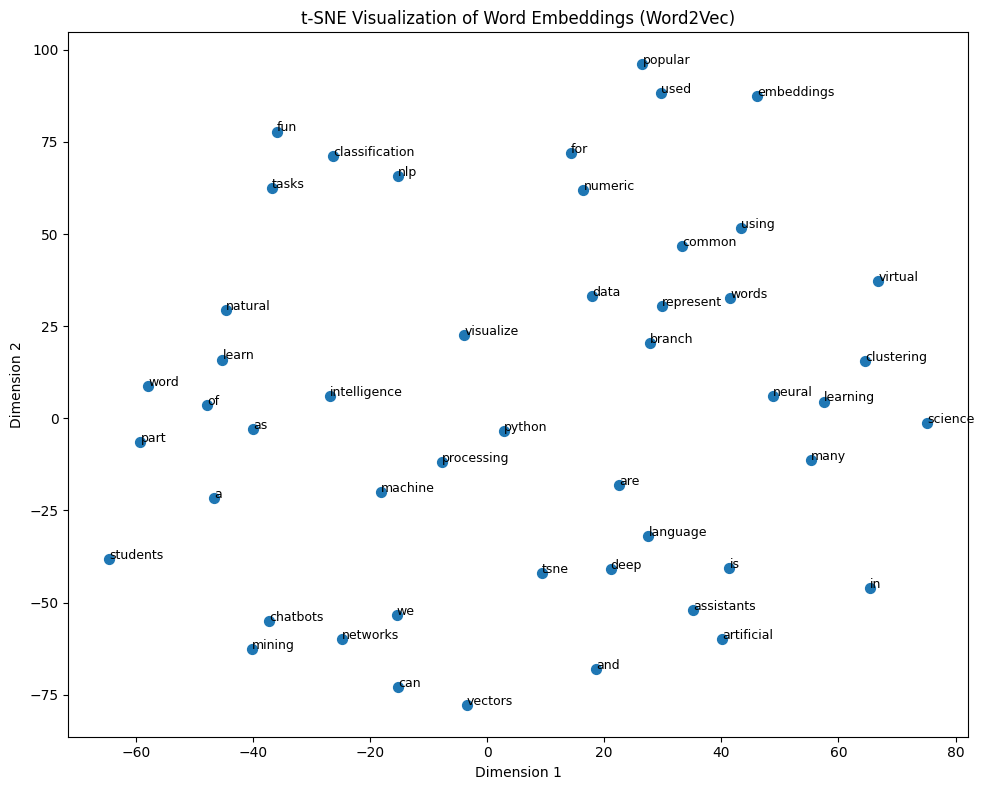

In [2]:
# ---------------------------------------------
# FULL COMBINED CODE: WORD EMBEDDING + t-SNE
# ---------------------------------------------

# 0. INSTALL REQUIRED LIBRARIES (necessary in Colab/Jupyter)
# If you run in normal Python, remove the ! and use: pip install gensim scikit-learn matplotlib
!pip install gensim scikit-learn matplotlib

# ---------------------------------------------
# 1. IMPORT LIBRARIES
# ---------------------------------------------
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------
# 2. DATASET (simple NLP corpus)
# ---------------------------------------------
corpus = [
    "machine learning is fun",
    "deep learning is a branch of machine learning",
    "natural language processing is part of artificial intelligence",
    "word embeddings represent words as numeric vectors",
    "we can visualize word embeddings using tsne",
    "neural networks are used for many nlp tasks",
    "python is popular for machine learning and data science",
    "students learn data mining and artificial intelligence",
    "nlp is used in chatbots and virtual assistants",
    "classification and clustering are common machine learning tasks"
]

# Tokenize sentences (split into words)
tokenized_sentences = [sentence.lower().split() for sentence in corpus]

# ---------------------------------------------
# 3. TRAIN WORD2VEC MODEL
# ---------------------------------------------
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=50,     # size of word embeddings
    window=3,           # context window
    min_count=1,        # include all words
    workers=1,          # CPU threads
    sg=1                # 1 = Skip-gram, 0 = CBOW
)

# Get vocabulary words
words = list(model.wv.index_to_key)

# Get each word’s embedding vector
word_vectors = np.array([model.wv[word] for word in words])

# ---------------------------------------------
# 4. APPLY t-SNE TO REDUCE 50D → 2D
# ---------------------------------------------
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=5,
    learning_rate="auto",
    init="random"
)

word_vectors_2d = tsne.fit_transform(word_vectors)

# ---------------------------------------------
# 5. PLOT 2D VISUALIZATION
# ---------------------------------------------
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], s=50)

# Label each point with the corresponding word
for i, word in enumerate(words):
    x, y = word_vectors_2d[i]
    plt.text(x + 0.02, y + 0.02, word, fontsize=9)

plt.title("t-SNE Visualization of Word Embeddings (Word2Vec)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()


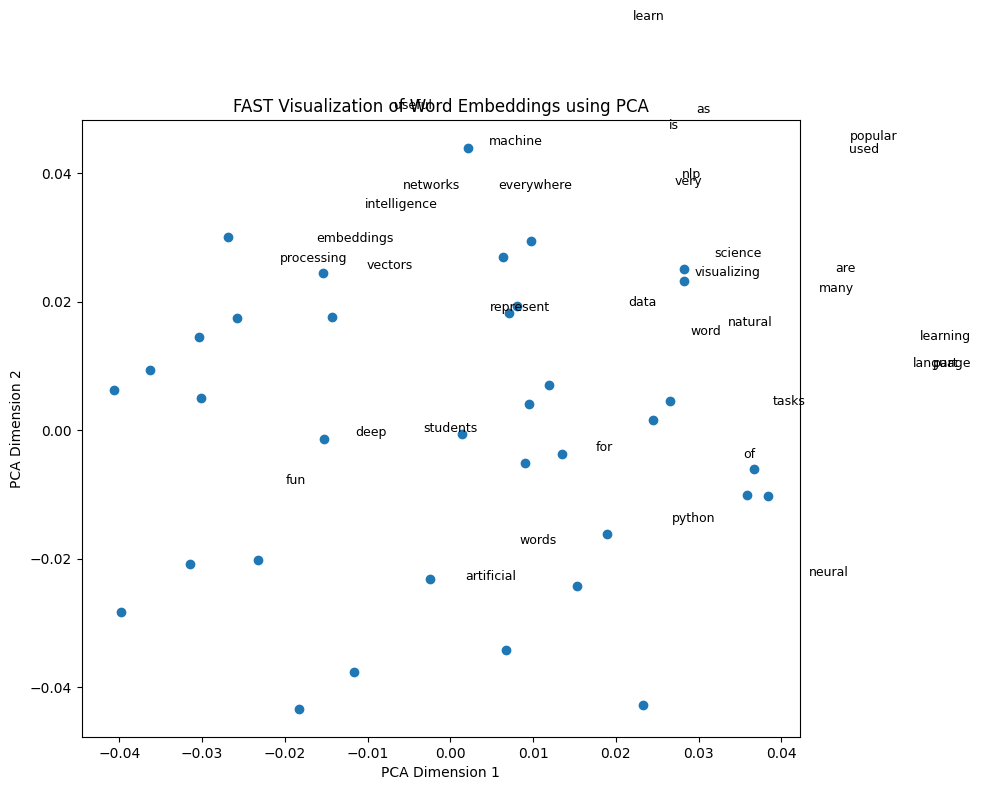

In [3]:
# -------------------------------------------------------
# FAST OUTPUT VERSION: Word Embedding + PCA Visualization
# -------------------------------------------------------

# INSTALL (important for Colab/Jupyter)
!pip install gensim scikit-learn matplotlib

# IMPORTS
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# DATASET (simple corpus)
# -------------------------------------------------------
corpus = [
    "machine learning is fun",
    "deep learning is part of machine learning",
    "natural language processing is used everywhere",
    "word embeddings represent words as vectors",
    "visualizing word embeddings is useful",
    "neural networks are used for many nlp tasks",
    "python is very popular for data science",
    "students learn artificial intelligence",
]

# Tokenization
tokenized_sentences = [sentence.lower().split() for sentence in corpus]

# -------------------------------------------------------
# TRAIN WORD2VEC MODEL
# -------------------------------------------------------
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=50,
    window=3,
    min_count=1,
    workers=1,
    sg=1
)

words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# -------------------------------------------------------
# FAST DIMENSION REDUCTION USING PCA (INSTANT)
# -------------------------------------------------------
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# -------------------------------------------------------
# PLOT RESULT
# -------------------------------------------------------
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

for i, word in enumerate(words):
    x, y = word_vectors_2d[i]
    plt.text(x + 0.02, y + 0.02, word, fontsize=9)

plt.title("FAST Visualization of Word Embeddings using PCA")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.tight_layout()
plt.show()



------ TIME REPORT ------
Word2Vec Training Time      : 0.0052 seconds
PCA Reduction Time          : 0.0018 seconds
TOTAL EXECUTION TIME        : 0.0073 seconds
--------------------------



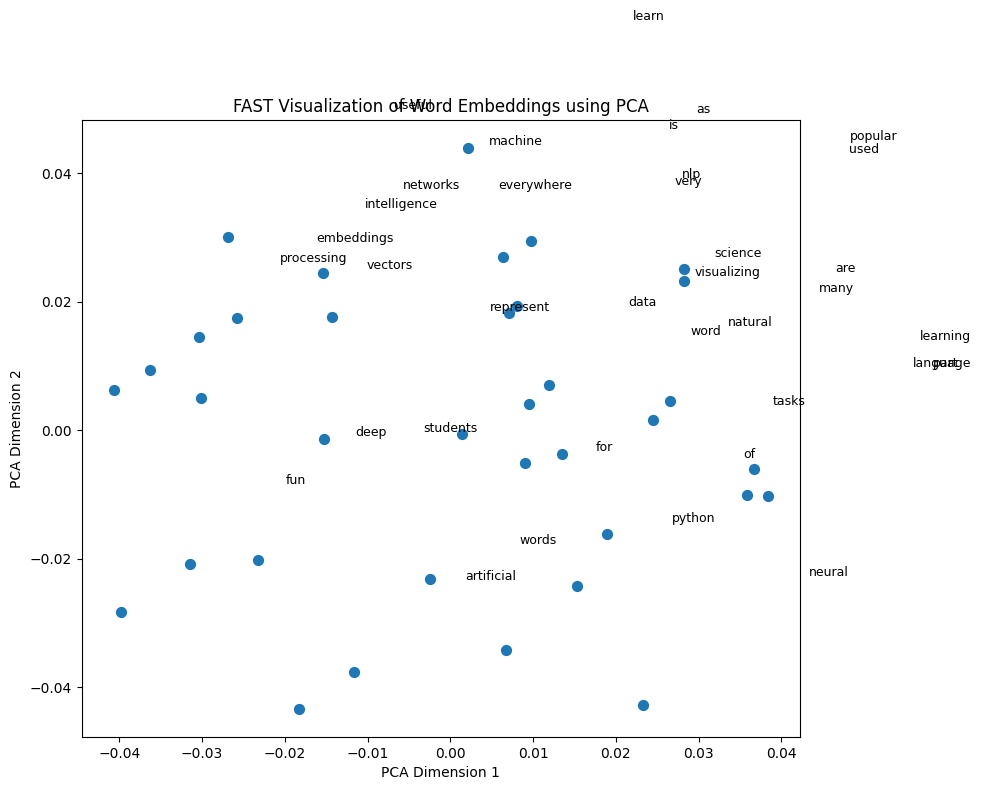

In [4]:
# -------------------------------------------------------
# FAST PCA + TIME MEASUREMENT VERSION (LAB EXAM READY)
# -------------------------------------------------------

!pip install gensim scikit-learn matplotlib

import time
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# START TOTAL TIME
# -------------------------------------------------------
start_total = time.time()

# -------------------------------------------------------
# DATASET
# -------------------------------------------------------
corpus = [
    "machine learning is fun",
    "deep learning is part of machine learning",
    "natural language processing is used everywhere",
    "word embeddings represent words as vectors",
    "visualizing word embeddings is useful",
    "neural networks are used for many nlp tasks",
    "python is very popular for data science",
    "students learn artificial intelligence"
]

tokenized_sentences = [sentence.lower().split() for sentence in corpus]

# -------------------------------------------------------
# TRAIN WORD2VEC MODEL
# -------------------------------------------------------
start_training = time.time()

model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=50,
    window=3,
    min_count=1,
    workers=1,
    sg=1
)

end_training = time.time()

# -------------------------------------------------------
# PCA DIMENSION REDUCTION
# -------------------------------------------------------
start_pca = time.time()

words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

end_pca = time.time()

# -------------------------------------------------------
# END TOTAL TIME
# -------------------------------------------------------
end_total = time.time()

# -------------------------------------------------------
# PRINT TIME REPORT
# -------------------------------------------------------
print("\n------ TIME REPORT ------")
print(f"Word2Vec Training Time      : {end_training - start_training:.4f} seconds")
print(f"PCA Reduction Time          : {end_pca - start_pca:.4f} seconds")
print(f"TOTAL EXECUTION TIME        : {end_total - start_total:.4f} seconds")
print("--------------------------\n")

# -------------------------------------------------------
# VISUALIZATION
# -------------------------------------------------------
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], s=50)

for i, word in enumerate(words):
    x, y = word_vectors_2d[i]
    plt.text(x + 0.02, y + 0.02, word, fontsize=9)

plt.title("FAST Visualization of Word Embeddings using PCA")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.tight_layout()
plt.show()


Time: 0.0135 seconds
Accuracy: 0.0267


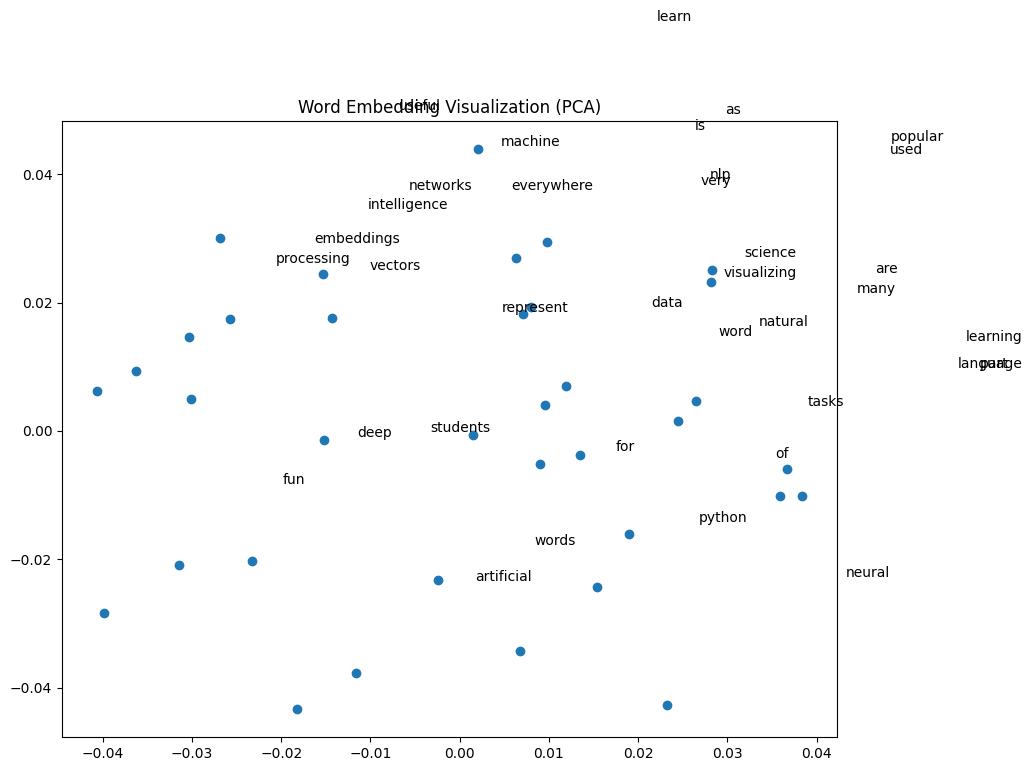

In [5]:
w